# Final Project (Coupled Pendulum)

In [246]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from coupled_pendulum_model import move_1_coupled_pendulum

In [247]:
np.random.seed(42)

## Import data

In [248]:
data = np.load('n_data.npz')
D = data['D_list'] * 1e-2
n = data['n_list']

sigma = 10

In [249]:
sorted_indices = np.argsort(D)
D = D[sorted_indices]
n = n[sorted_indices]

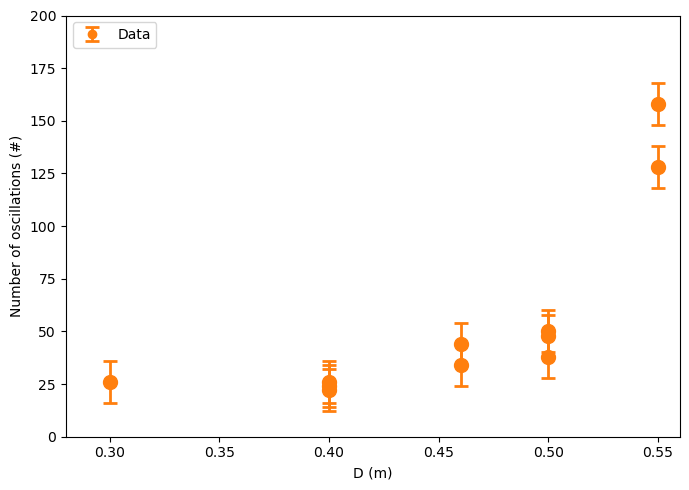

In [250]:
plt.figure(figsize=(7, 5))
plt.scatter(D, n, label='__no_legend__', s=100, color='C1')
D_plot = np.linspace(0.25, 0.565, 100)
plt.errorbar(D, n, yerr=sigma, fmt='o', color='C1', 
             label='Data', capsize=5, capthick=2, elinewidth=2)
plt.ylim(bottom=0, top=200)
plt.ylabel('Number of oscillations (#)')
plt.xlabel('D (m)')
plt.xlim(left=0.28, right=0.56)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('original_data.png')
plt.show()

In [251]:
def fitting_model(D, s, d):
    model = move_1_coupled_pendulum(D=D, s=s, d=d, L=0.41, g=9.81)
    return model.N

In [252]:
propt, pcov = curve_fit(fitting_model, D, n, p0=[0.18, 0.21], sigma=sigma,
                        absolute_sigma=True, bounds=([0, 0], [1, 1]))
propt_ls, pcov_ls = curve_fit(fitting_model, D, n, p0=[0.18, 0.21], bounds=([0, 0], [1, 1]))

In [253]:
print('Covariance matrix:')
print(pcov)

Covariance matrix:
[[ 0.00011299 -0.00024882]
 [-0.00024882  0.00054868]]


In [254]:
print('Correlation Coefficient', pcov[0, 1] / np.sqrt(pcov[0, 0] * pcov[1, 1]))
print('Coefficient of determination:', 1 - np.sum((n - fitting_model(D, *propt))**2) / np.sum((n - np.mean(n))**2))

Correlation Coefficient -0.9993148899917605
Coefficient of determination: 0.967154110332275


In [255]:
print('Fitted error:')
print(np.sqrt(np.diag(pcov)))

Fitted error:
[0.01062966 0.02342402]


In [256]:
print('Fitted error (LS):')
print(np.sqrt(np.diag(pcov_ls)))

Fitted error (LS):
[0.00921452 0.02030554]


In [257]:
print('Fitted parameters:')
print('s =', propt[0])
print(np.abs(propt[0]-0.18)/0.18*100)
print('d =', propt[1])
print(np.abs(propt[1]-0.21)/0.21*100)

Fitted parameters:
s = 0.16007545979593227
11.069189002259847
d = 0.24329449717687138
15.854522465176851


In [258]:
print('Fitted parameters (LS):')
print('s =', propt_ls[0])
print(np.abs(propt_ls[0]-0.18)/0.18*100)
print('d =', propt_ls[1])
print(np.abs(propt_ls[1]-0.21)/0.21*100)

Fitted parameters (LS):
s = 0.16007545982740543
11.069188984774762
d = 0.24329449710747708
15.85452243213195


/Users/hyp0515/Desktop/exp_phy_ii/final/coupled_pendulum_model.py:32: RuntimeWarning: invalid value encountered in arcsin
  self.th = np.arcsin(0.5*(D-d)/s)


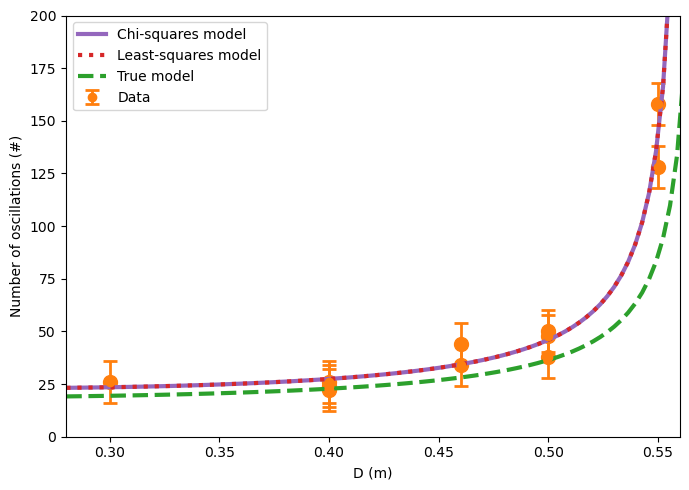

In [259]:
plt.figure(figsize=(7, 5))
plt.scatter(D, n, label='__no_legend__', s=100, color='C1')
D_plot = np.linspace(0.25, 0.565, 100)
plt.errorbar(D, n, yerr=sigma, fmt='o', color='C1', 
             label='Data', capsize=5, capthick=2, elinewidth=2)
plt.plot(D_plot, fitting_model(D_plot, *propt), label='Chi-squares model', linewidth=3, 
         color='C4')
plt.plot(D_plot, fitting_model(D_plot, *propt_ls), label='Least-squares model',
         linestyle=':', linewidth=3, color='C3')
plt.plot(D_plot, fitting_model(D_plot, 0.18, 0.21), label='True model', linestyle='--', 
         linewidth=3, color='C2')
plt.ylim(bottom=0, top=200)
plt.ylabel('Number of oscillations (#)')
plt.xlabel('D (m)')
plt.xlim(left=0.28, right=0.56)
plt.legend()
plt.tight_layout()
plt.savefig('fitting_residual.png')
plt.show()

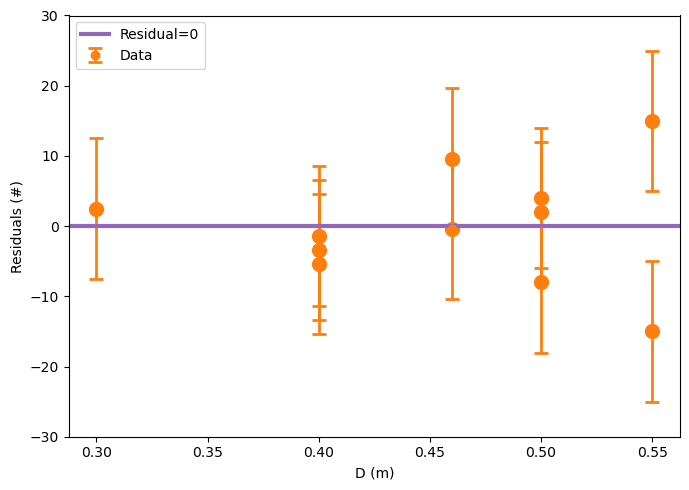

In [260]:
residuals = n - fitting_model(D, *propt)
plt.figure(figsize=(7, 5))
plt.scatter(D, residuals, color='C1', label='__no_legend__', s=100)
plt.errorbar(D, residuals, yerr=sigma, fmt='o', color='C1', 
             label='Data', capsize=5, capthick=2, elinewidth=2)
plt.axhline(0, color='C4', linestyle='-', linewidth=3, 
            label='Residual=0')
plt.xlabel('D (m)')
plt.ylabel('Residuals (#)')
plt.ylim((-30, 30))
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('fitting_residuals.png')
plt.show()

In [261]:
dof = len(n) - len(propt)
chisq = np.sum(((n - fitting_model(D, *propt)) / sigma) ** 2)
reduced_chisq = chisq / dof
print('Chi2:', chisq)
print('Degrees of freedom:', dof)
print('Reduced chi2:', reduced_chisq)

Chi2: 6.763147841982754
Degrees of freedom: 9
Reduced chi2: 0.751460871331417


In [262]:
p_value = chi2.sf(chisq, dof)
print('p-value:', p_value)

p-value: 0.6617636566704693
